# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [ ]:
X = df.drop(['Unnamed: 0', 'data_ref'], axis=1)
X.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


<ipython-input-5-a7085d70cd4f>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-5-a7085d70cd4f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-5-a7085d70cd4f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
<ipython-input-5-a7085d70cd4f>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')


[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Governamental'),
 Text(4, 0, 'Estúdio'),
 Text(5, 0, 'Comunitário')]

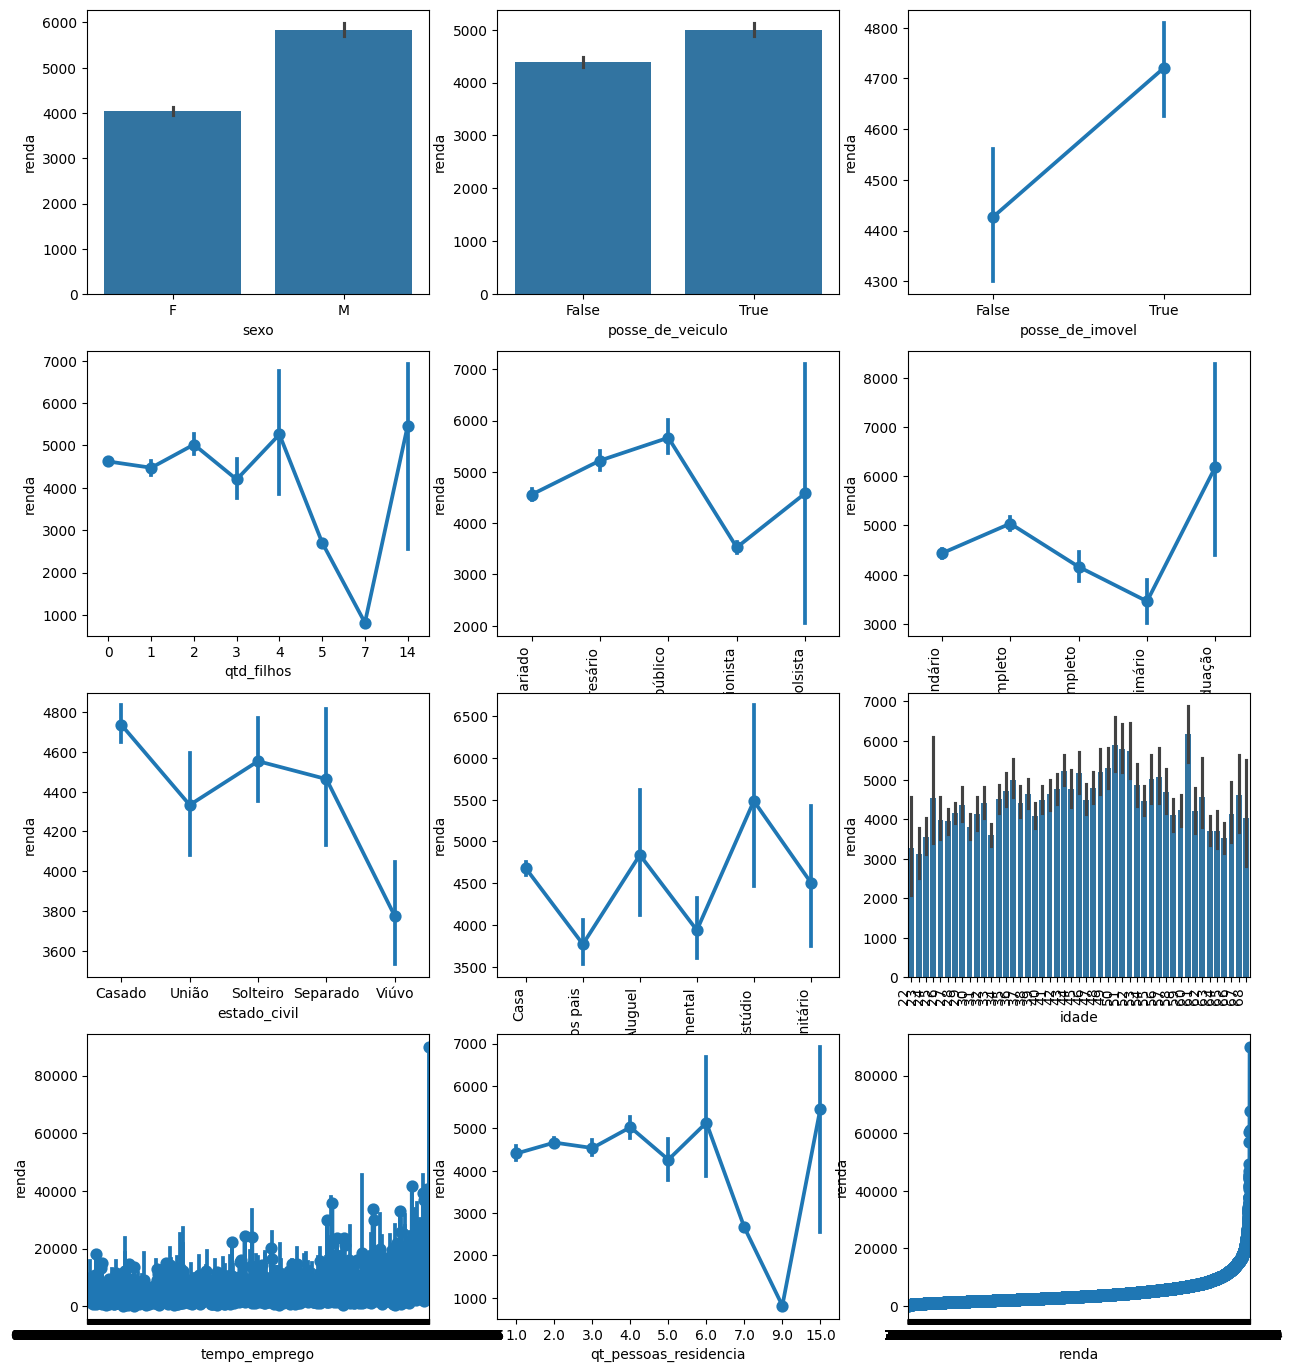

In [ ]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(4, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = X)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.pointplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)
tipo_renda = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'tipo_renda', data = X)
educação = sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'educacao', data = X)
sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'estado_civil', data = X)
tipo_residencia = sns.pointplot(ax = axes[2, 1],y = 'renda', x = 'tipo_residencia', data = X)
idade = sns.barplot(ax = axes[2, 2],y = 'renda', x = 'idade', data = X)
tempo_emprego = sns.pointplot(ax = axes[3, 0],y = 'renda', x = 'tempo_emprego', data = X)
sns.pointplot(ax = axes[3, 1],y = 'renda', x = 'qt_pessoas_residencia', data = X)
sns.pointplot(ax = axes[3, 2],y = 'renda', x = 'renda', data = X)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

In [ ]:
# Dividindo os dados em 75% para treinamento e o restante (25%) para teste
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [ ]:
# Preparando os dados para análise
X1 = patsy.dmatrices('''np.log(renda) ~ C(sexo)
                    + C(posse_de_veiculo)
                    + C(posse_de_imovel)
                    + qtd_filhos
                    + C(tipo_renda)
                    + C(educacao, Treatment(2))
                    + C(estado_civil)
                    + C(tipo_residencia, Treatment(1))
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia
                    + 1''', X_test)

In [ ]:
# Ajustando os modelos lineares [0, 0.001, 0.005, 0.01, 0.05, 0.1]
modelo = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     38.79
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.15e-162
Time:                        00:09:35   Log-Likelihood:                -3284.7
No. Observations:                3105   AIC:                             6621.
Df Residuals:                    3080   BIC:                             6778.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3618      0.411     17.913      0.000       6.556       8.168
C(sexo)[T.M]                                          0.4823      0.029     16.843      0.000       0.426       0.538
C(posse_de_veiculo)[T.True]                           0.0164      0.028      0.592      0.554      -0.038       0.071
C(posse_de_imovel)[T.True]                            0.1090      0.027      4.033      0.000       0.056       0.162
C(tipo_renda)[T.Bolsista]                            -0.1716      0.701     -0.245      0.807      -1.545       1.202
C(tipo_renda)[T.Empresário]                           0.1608      0.030      5.418      0.000       0.103       0.219
C(tipo_renda)[T.Pensionista]                          0.4815      0.351      1.372      0.170      -0.207       1.170
C(tipo_renda)[T.Servidor público]                     0.1028      0.042      2.453      0.014       0.021       0.185
C(educacao, Treatment(2))[T.Primário]                 0.0913      0.145      0.631      0.528      -0.192       0.375
C(educacao, Treatment(2))[T.Pós graduação]            0.2572      0.405      0.634      0.526      -0.538       1.052
C(educacao, Treatment(2))[T.Superior completo]        0.0871      0.027      3.203      0.001       0.034       0.140
C(educacao, Treatment(2))[T.Superior incompleto]      0.0124      0.058      0.214      0.831      -0.101       0.126
C(estado_civil)[T.Separado]                          -0.1296      0.209     -0.619      0.536      -0.540       0.281
C(estado_civil)[T.Solteiro]                          -0.1019      0.205     -0.498      0.619      -0.503       0.299
C(estado_civil)[T.União]                              0.0392      0.048      0.823      0.411      -0.054       0.133
C(estado_civil)[T.Viúvo]                             -0.0648      0.223     -0.291      0.771      -0.502       0.372
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0834      0.095     -0.878      0.380      -0.270       0.103
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.1140      0.058     -1.966      0.049      -0.228      -0.000
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.3026      0.212      1.427      0.154      -0.113       0.718
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.2346      0.150     -1.561      0.119      -0.529       0.060
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.1558      0.078     -2.004      0.045      -0.308      -0.003
qtd_filhos                                            0.0870      0.203      0.429      0.668      -0.311       0.485
idade                                                 0.0056      0.002      3.535      0.000       0.002       0.009
tempo_emprego  

In [ ]:
modelo1 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     53.60
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          4.20e-167
Time:                        00:10:25   Log-Likelihood:                -3287.4
No. Observations:                3105   AIC:                             6613.
Df Residuals:                    3087   BIC:                             6728.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3857      0.410     17.995      0.000       6.581       8.190
C(sexo)[T.M]                                          0.4808      0.028     16.889      0.000       0.425       0.537
C(posse_de_veiculo)[T.True]                           0.0145      0.028      0.525      0.600      -0.040       0.069
C(posse_de_imovel)[T.True]                            0.1077      0.027      3.991      0.000       0.055       0.161
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1584      0.030      5.353      0.000       0.100       0.216
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                     0.0992      0.042      2.370      0.018       0.017       0.181
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]        0.0862      0.027      3.243      0.001       0.034       0.138
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                          -0.1340      0.209     -0.641      0.522      -0.544       0.276
C(estado_civil)[T.Solteiro]                          -0.1029      0.205     -0.503      0.615      -0.504       0.298
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                             -0.0695      0.223     -0.312      0.755      -0.506       0.367
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0881      0.095     -0.927      0.354      -0.274       0.098
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.1151      0.058     -1.992      0.046      -0.228      -0.002
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.2368      0.150     -1.576      0.115      -0.531       0.058
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.1607      0.078     -2.068      0.039      -0.313      -0.008
qtd_filhos                                            0.0859      0.203      0.424      0.672      -0.312       0.483
idade                                                 0.0053      0.002      3.428      0.001       0.002       0.008
tempo_emprego  

In [ ]:
modelo2 = smf.ols(X1, data = X_train).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     104.6
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.60e-171
Time:                        00:12:30   Log-Likelihood:                -3297.5
No. Observations:                3105   AIC:                             6615.
Df Residuals:                    3096   BIC:                             6675.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2290      0.078     92.934      0.000       7.077       7.382
C(sexo)[T.M]                                          0.4835      0.027     18.103      0.000       0.431       0.536
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.1186      0.027      4.448      0.000       0.066       0.171
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1705      0.029      5.785      0.000       0.113       0.228
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                     0.1099      0.042      2.635      0.008       0.028       0.192
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.1099      0.058     -1.907      0.057      -0.223       0.003
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0050      0.001      3.313      0.001       0.002       0.008
tempo_emprego  

In [ ]:
modelo3 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          2.64e-167
Time:                        00:12:31   Log-Likelihood:                -3314.3
No. Observations:                3105   AIC:                             6643.
Df Residuals:                    3099   BIC:                             6685.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2595      0.075     96.909      0.000       7.113       7.406
C(sexo)[T.M]                                          0.4756      0.027     17.758      0.000       0.423       0.528
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1613      0.029      5.566      0.000       0.104       0.218
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0061      0.001      4.103      0.000       0.003       0.009
tempo_emprego  

In [ ]:
modelo4 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     213.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.24e-161
Time:                        00:12:36   Log-Likelihood:                -3332.9
No. Observations:                3105   AIC:                             6676.
Df Residuals:                    3101   BIC:                             6706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.4229      0.059    125.463      0.000       7.307       7.539
C(sexo)[T.M]                                          0.4775      0.027     17.800      0.000       0.425       0.530
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0052      0.001      3.643      0.000       0.002       0.008
tempo_emprego  

In [ ]:
modelo5 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     213.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.24e-161
Time:                        00:12:37   Log-Likelihood:                -3332.9
No. Observations:                3105   AIC:                             6676.
Df Residuals:                    3101   BIC:                             6706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.4229      0.059    125.463      0.000       7.307       7.539
C(sexo)[T.M]                                          0.4775      0.027     17.800      0.000       0.425       0.530
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0052      0.001      3.643      0.000       0.002       0.008
tempo_emprego  

In [ ]:
# Usando os modelos acima para calcular o R quadrado
X_test['log_renda']=np.log(X_test['renda'])

In [ ]:
X_test['pred'] = modelo.predict(X_test)
r = X_test[['pred', 'log_renda']].corr().iloc[0,1]
r**2

0.23946914174421555

In [ ]:
X_test['pred1'] = modelo1.predict(X_test)
r = X_test[['pred1', 'log_renda']].corr().iloc[0,1]
r**2

0.23812285780022174

In [ ]:
X_test['pred2'] = modelo2.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.2331595362678573

In [ ]:
X_test['pred3'] = modelo3.predict(X_test)
r = X_test[['pred3', 'log_renda']].corr().iloc[0,1]
r**2

0.22481273348719064

In [ ]:
X_test['pred4'] = modelo4.predict(X_test)
r = X_test[['pred4', 'log_renda']].corr().iloc[0,1]
r**2

0.21549608421314714

In [ ]:
X_test['pred5'] = modelo5.predict(X_test)
r = X_test[['pred5', 'log_renda']].corr().iloc[0,1]
r**2

0.21549608421314714

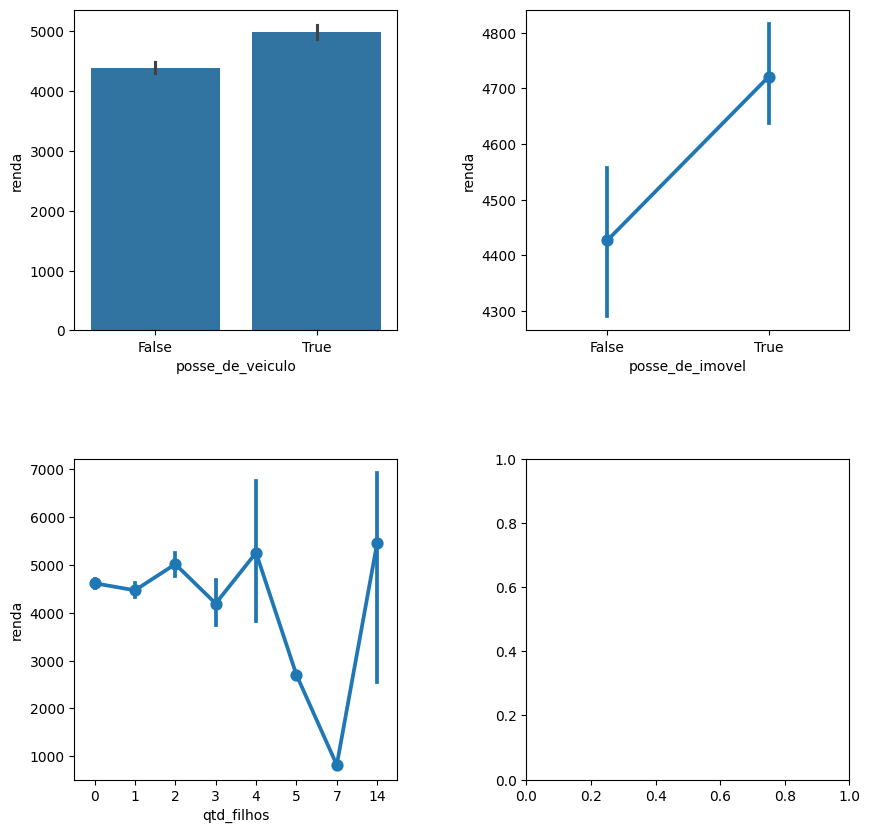

In [ ]:

plt.close('all')

plt.rc('figure', figsize=(10, 10))
fig, axes = plt.subplots(2, 2)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.pointplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)

plt.subplots_adjust(wspace=0.4, hspace=0.4)